In this project I am gonna give attention to Data Analysis of data from different sensors in Cracow about air quality as well as predicting PM10 levels from sensor number 171 located near Lublańska street.

In [24]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the data and quick look at it

In [2]:
sensors = pd.read_csv("data/sensor_locations.csv")

# all names of months in lowercase
months = [datetime.date(2021, month, 1).strftime('%B').lower() for month in range(1, 13)]
#air_quality['UTC time'] = pd.to_datetime(air_quality['UTC time'])
air_quality = [pd.read_csv("data/" + month + "-2017.csv") for month in months]
air_quality = pd.concat(air_quality)

air_quality.head(30)

,UTC time,3_temperature,3_humidity,3_pressure,3_pm1,3_pm25,3_pm10,140_temperature,140_humidity,140_pressure,...,857_pressure,857_pm1,857_pm25,857_pm10,895_temperature,895_humidity,895_pressure,895_pm1,895_pm25,895_pm10
0,2017-01-01T00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-01T01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-01-01T02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-01-01T03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-01-01T04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2017-01-01T05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2017-01-01T06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2017-01-01T07:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2017-01-01T08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2017-01-01T09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
print(air_quality.dtypes)

UTC time          object
3_temperature    float64
3_humidity       float64
3_pressure       float64
3_pm1            float64
                  ...   
895_humidity     float64
895_pressure     float64
895_pm1          float64
895_pm25         float64
895_pm10         float64
Length: 337, dtype: object


UTC time has object type instead of Pandas's datetime. We have to fix it.

In [4]:
air_quality['UTC time'] = pd.to_datetime(air_quality['UTC time'])

In [5]:
print(air_quality.index.duplicated().any())

True


Indexes are not-unique, so to speed up Pandas operations I will reindex the DataFrame.

In [6]:
air_quality.index = np.arange(1, len(air_quality)+1)

Let's find out what are the feature variables in the data.

In [7]:
print(air_quality.columns)

Index(['UTC time', '3_temperature', '3_humidity', '3_pressure', '3_pm1',
       '3_pm25', '3_pm10', '140_temperature', '140_humidity', '140_pressure',
       ...
       '857_pressure', '857_pm1', '857_pm25', '857_pm10', '895_temperature',
       '895_humidity', '895_pressure', '895_pm1', '895_pm25', '895_pm10'],
      dtype='object', length=337)


In [8]:
print(int((len(air_quality.columns) - 1) / 6))

56


We have data from 56 sensors, whilst every sensor have variable about its temp, humidity, pressure as well as pm1, pm10, pm25 content. Additionally, we got UTC time of the measurement.

## Exploratory Data Analysis

#### Handling missing values

In [9]:
pd.set_option('display.max_rows', 500)
print(air_quality.isnull().sum().sort_values(ascending = False))
pd.set_option('display.max_rows', 100)

203_pressure       8593
178_pressure       8593
3_humidity         8387
3_temperature      8387
183_pressure       7639
808_temperature    7495
808_humidity       7495
808_pm10           7446
808_pressure       7446
808_pm1            7446
808_pm25           7446
3_pressure         7415
3_pm1              7358
3_pm10             7358
3_pm25             7358
205_pressure       7183
211_pressure       7169
211_humidity       7145
211_temperature    7144
211_pm10           7144
211_pm1            7144
211_pm25           7144
185_pressure       7135
179_pressure       7020
172_humidity       6997
172_temperature    6997
182_pressure       6892
196_pressure       6863
184_pressure       6860
181_pressure       6859
180_pressure       6855
201_pressure       6854
176_pressure       6854
178_humidity       6617
178_temperature    6617
142_pm25           6603
142_pm10           6603
142_pm1            6603
178_pm10           6588
178_pm1            6588
178_pm25           6588
142_pressure    

Every variable, except of time of course, has missing values, many of them have enormous numbers of NaNs. We have to take care of it.

Dropping all columns, which have significant number of missing values, would lead to loss of too much information. We will apply imputing for variables which have less than 5000 missing values. For the others we will drop the columns. Our strategy for imputer will be median, because I haven't carried out outlier analysis yet and I have a feeling that this will be safer than mean.

In [10]:
# mask for Series made by summing null values in every column, taking only values which have more
 # than 5000 NaNs and dropping null values(values with <5000NaNs)
mask = air_quality.isnull().sum()>5000
cols_not_for_drop = air_quality.isnull().sum().mask(mask).dropna().index

In [11]:
air_quality = air_quality[cols_not_for_drop]# dropping columns with significant amount of NaNs
cols = air_quality.columns.drop('UTC time')# for Simple Imputer

In [12]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'median')
air_quality_transformed = pd.DataFrame(imputer.fit_transform(air_quality[cols]), columns = cols,
                                       index = pd.RangeIndex(1, len(air_quality) + 1, 1))
air_quality_transformed.head(30)

,140_temperature,140_humidity,140_pressure,140_pm1,140_pm25,140_pm10,147_pressure,147_pm1,147_pm25,147_pm10,...,622_pressure,622_pm1,622_pm25,622_pm10,895_temperature,895_humidity,895_pressure,895_pm1,895_pm25,895_pm10
1,11.0,86.0,101666.0,23.0,19.0,34.0,102505.0,196.0,222.0,346.0,...,101891.0,24.0,21.0,39.0,10.0,85.0,101686.0,21.0,19.0,33.0
2,11.0,86.0,101666.0,23.0,19.0,34.0,102454.0,187.0,211.0,330.0,...,101891.0,24.0,21.0,39.0,10.0,85.0,101686.0,21.0,19.0,33.0
3,11.0,86.0,101666.0,23.0,19.0,34.0,102375.0,187.0,212.0,333.0,...,101891.0,24.0,21.0,39.0,10.0,85.0,101686.0,21.0,19.0,33.0
4,11.0,86.0,101666.0,23.0,19.0,34.0,102322.0,167.0,188.0,296.0,...,101891.0,24.0,21.0,39.0,10.0,85.0,101686.0,21.0,19.0,33.0
5,11.0,86.0,101666.0,23.0,19.0,34.0,102277.0,164.0,184.0,290.0,...,101891.0,24.0,21.0,39.0,10.0,85.0,101686.0,21.0,19.0,33.0
6,11.0,86.0,101666.0,23.0,19.0,34.0,102248.0,150.0,166.0,261.0,...,101891.0,24.0,21.0,39.0,10.0,85.0,101686.0,21.0,19.0,33.0
7,11.0,86.0,101666.0,23.0,19.0,34.0,102211.0,137.0,151.0,238.0,...,101891.0,24.0,21.0,39.0,10.0,85.0,101686.0,21.0,19.0,33.0
8,11.0,86.0,101666.0,23.0,19.0,34.0,102204.0,122.0,132.0,209.0,...,101891.0,24.0,21.0,39.0,10.0,85.0,101686.0,21.0,19.0,33.0
9,11.0,86.0,101666.0,23.0,19.0,34.0,102182.0,110.0,118.0,186.0,...,101891.0,24.0,21.0,39.0,10.0,85.0,101686.0,21.0,19.0,33.0
10,11.0,86.0,101666.0,23.0,19.0,34.0,102140.0,117.0,126.0,200.0,...,101891.0,24.0,21.0,39.0,10.0,85.0,101686.0,21.0,19.0,33.0


In [17]:
air_quality = pd.concat([air_quality['UTC time'], air_quality_transformed], axis = 1)
air_quality.head(30)

,UTC time,140_temperature,140_humidity,140_pressure,140_pm1,140_pm25,140_pm10,147_pressure,147_pm1,147_pm25,...,622_pressure,622_pm1,622_pm25,622_pm10,895_temperature,895_humidity,895_pressure,895_pm1,895_pm25,895_pm10
1,2017-01-01 00:00:00,11.0,86.0,101666.0,23.0,19.0,34.0,102505.0,196.0,222.0,...,101891.0,24.0,21.0,39.0,10.0,85.0,101686.0,21.0,19.0,33.0
2,2017-01-01 01:00:00,11.0,86.0,101666.0,23.0,19.0,34.0,102454.0,187.0,211.0,...,101891.0,24.0,21.0,39.0,10.0,85.0,101686.0,21.0,19.0,33.0
3,2017-01-01 02:00:00,11.0,86.0,101666.0,23.0,19.0,34.0,102375.0,187.0,212.0,...,101891.0,24.0,21.0,39.0,10.0,85.0,101686.0,21.0,19.0,33.0
4,2017-01-01 03:00:00,11.0,86.0,101666.0,23.0,19.0,34.0,102322.0,167.0,188.0,...,101891.0,24.0,21.0,39.0,10.0,85.0,101686.0,21.0,19.0,33.0
5,2017-01-01 04:00:00,11.0,86.0,101666.0,23.0,19.0,34.0,102277.0,164.0,184.0,...,101891.0,24.0,21.0,39.0,10.0,85.0,101686.0,21.0,19.0,33.0
6,2017-01-01 05:00:00,11.0,86.0,101666.0,23.0,19.0,34.0,102248.0,150.0,166.0,...,101891.0,24.0,21.0,39.0,10.0,85.0,101686.0,21.0,19.0,33.0
7,2017-01-01 06:00:00,11.0,86.0,101666.0,23.0,19.0,34.0,102211.0,137.0,151.0,...,101891.0,24.0,21.0,39.0,10.0,85.0,101686.0,21.0,19.0,33.0
8,2017-01-01 07:00:00,11.0,86.0,101666.0,23.0,19.0,34.0,102204.0,122.0,132.0,...,101891.0,24.0,21.0,39.0,10.0,85.0,101686.0,21.0,19.0,33.0
9,2017-01-01 08:00:00,11.0,86.0,101666.0,23.0,19.0,34.0,102182.0,110.0,118.0,...,101891.0,24.0,21.0,39.0,10.0,85.0,101686.0,21.0,19.0,33.0
10,2017-01-01 09:00:00,11.0,86.0,101666.0,23.0,19.0,34.0,102140.0,117.0,126.0,...,101891.0,24.0,21.0,39.0,10.0,85.0,101686.0,21.0,19.0,33.0


#### Descriptive statistics of target variable

In [18]:
air_quality['171_pm10'].describe().round(2)

count    8593.00
mean       49.56
std        55.84
min         0.00
25%        16.00
50%        32.00
75%        60.00
max       451.00
Name: 171_pm10, dtype: float64

In [20]:
air_quality['171_pm10'].kurtosis(axis = 0)

10.957043055515772

In [21]:
air_quality['171_pm10'].skew(axis = 0)

2.9270613747578342

Conclusions:

- kurtosis is enormous so we have values focusing around mean
- skewness is greater than 0 so the mass of the distribution is concentrated on the left
- certainly distribution is not normal

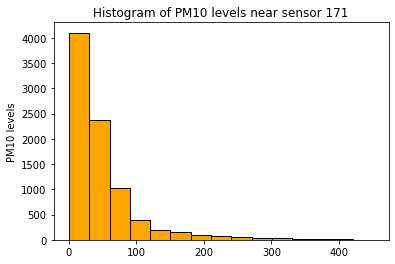

In [70]:
plt.hist(air_quality['171_pm10'], color = 'orange', bins = 15, edgecolor = 'black')
plt.title("Histogram of PM10 levels near sensor 171")
plt.ylabel("PM10 levels")
#plt.rcParams["figure.figsize"] = (8,6)
plt.show()

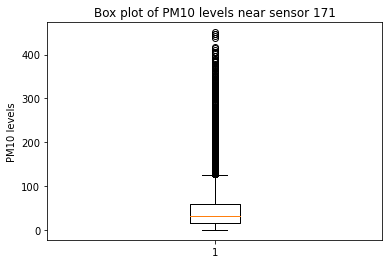

In [52]:
plt.boxplot(air_quality['171_pm10'])
plt.title("Box plot of PM10 levels near sensor 171")
plt.ylabel("PM10 levels")
plt.show()

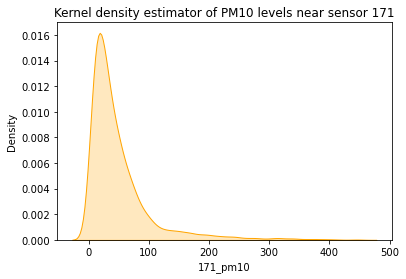

In [69]:
import seaborn as sns

sns.kdeplot(data=air_quality['171_pm10'], fill = True, color = 'orange')
plt.title("Kernel density estimator of PM10 levels near sensor 171")
plt.show()

#### Outlier detection

IQR method will be my choice for outliers removal, because I think that it's safe for this distribution of data (not normal).

In [76]:
def is_outlier_iqr(dt, feature):
    q1 = dt.quantile(.25)[feature]
    q3 = dt.quantile(.75)[feature]
    iqr = round(q3 - q1, 2)
    higher_boundary = q3 + 1.5 * iqr
    lower_boundary = q1 - 1.5 * iqr
    df_out = dt.loc[(dt[feature] > lower_boundary) & (dt[feature] < higher_boundary)]
    return df_out

count = 0
columns = air_quality.columns.drop('UTC time')
for feature in columns:
    air_quality = is_outlier_iqr(air_quality, feature)
    count += 1
print("{} outliers removed".format(count))

265 outliers removed
